In [4]:
!pip install kaggle

In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
# API to fetch the dataset from Kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:01<00:00, 99.1MB/s]
100% 163M/163M [00:01<00:00, 128MB/s] 


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

 data   face-mask-dataset.zip   sample_data  'with mask image.jfif'


**Importing the Dependices**

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5])

['with_mask_35.jpg', 'with_mask_3444.jpg', 'with_mask_933.jpg', 'with_mask_3449.jpg', 'with_mask_448.jpg']
with_mask_2012.jpg


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5])

['without_mask_22.jpg', 'without_mask_1295.jpg', 'without_mask_67.jpg', 'without_mask_3176.jpg', 'without_mask_3124.jpg']
without_mask_883.jpg


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of with out mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of with out mask images: 3828


**Creating Labels for the two class ofImages**

With mask --> 1
with out mask --> 0

In [13]:
# create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [14]:
labels = with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

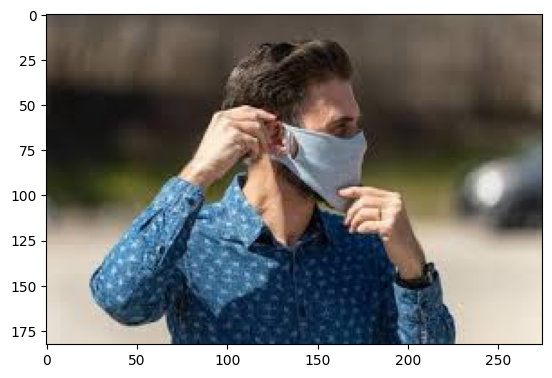

In [15]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)

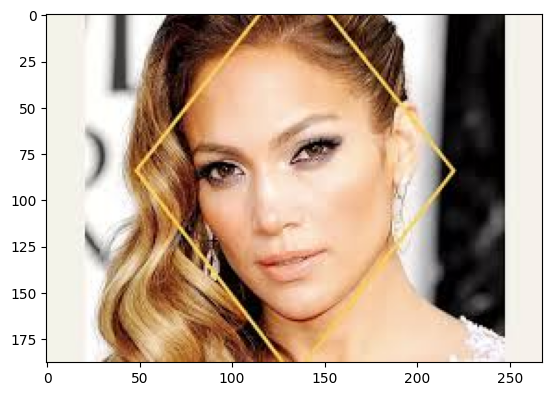

In [16]:
#displaying with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2929.jpg')
imgplot = plt.imshow(img)

Image Processing

1.Resize the Images
2.COnvert the images to numpy arrays


In [17]:
# COnvert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[69, 65, 66],
        [69, 65, 66],
        [67, 63, 64],
        ...,
        [62, 56, 57],
        [63, 57, 56],
        [59, 54, 51]],

       [[68, 63, 65],
        [68, 64, 65],
        [67, 63, 64],
        ...,
        [56, 51, 51],
        [60, 54, 51],
        [59, 53, 50]],

       [[65, 59, 61],
        [62, 56, 58],
        [61, 55, 57],
        ...,
        [54, 48, 46],
        [60, 53, 50],
        [63, 54, 52]],

       ...,

       [[44, 41, 50],
        [44, 41, 50],
        [41, 38, 49],
        ...,
        [22, 22, 35],
        [20, 22, 34],
        [19, 21, 33]],

       [[46, 43, 52],
        [45, 43, 51],
        [42, 38, 48],
        ...,
        [21, 21, 34],
        [20, 20, 32],
        [19, 21, 33]],

       [[48, 45, 54],
        [46, 43, 52],
        [42, 38, 48],
        ...,
        [20, 20, 33],
        [20, 20, 32],
        [19, 21, 33]]], dtype=uint8)
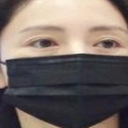

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X =  np.array(data)
Y = np.array(labels)

type(X)
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 51,  52,  47],
        [ 50,  51,  46],
        [ 49,  50,  45],
        ...,
        [ 56,  56,  56],
        [ 56,  56,  56],
        [ 57,  57,  57]],

       [[ 51,  52,  47],
        [ 50,  51,  46],
        [ 49,  50,  45],
        ...,
        [ 57,  57,  57],
        [ 57,  57,  57],
        [ 58,  58,  58]],

       [[ 51,  52,  47],
        [ 50,  51,  46],
        [ 49,  50,  45],
        ...,
        [ 57,  57,  57],
        [ 58,  58,  58],
        [ 59,  59,  59]],

       ...,

       [[ 61,  58,  65],
        [ 61,  58,  65],
        [ 56,  53,  60],
        ...,
        [121, 132, 155],
        [117, 128, 150],
        [112, 123, 145]],

       [[ 63,  60,  67],
        [ 57,  54,  61],
        [ 46,  43,  50],
        ...,
        [128, 139, 161],
        [126, 137, 159],
        [123, 134, 156]],

       [[ 65,  62,  69],
        [ 54,  51,  58],
        [ 38,  35,  42],
        ...,
        [128, 138, 161],
        [125, 136, 158],
        [122, 133, 155]]], dtype=uint8)
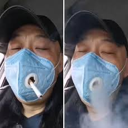

In [28]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[0.2       , 0.20392157, 0.18431373],
        [0.19607843, 0.2       , 0.18039216],
        [0.19215686, 0.19607843, 0.17647059],
        ...,
        [0.21960784, 0.21960784, 0.21960784],
        [0.21960784, 0.21960784, 0.21960784],
        [0.22352941, 0.22352941, 0.22352941]],

       [[0.2       , 0.20392157, 0.18431373],
        [0.19607843, 0.2       , 0.18039216],
        [0.19215686, 0.19607843, 0.17647059],
        ...,
        [0.22352941, 0.22352941, 0.22352941],
        [0.22352941, 0.22352941, 0.22352941],
        [0.22745098, 0.22745098, 0.22745098]],

       [[0.2       , 0.20392157, 0.18431373],
        [0.19607843, 0.2       , 0.18039216],
        [0.19215686, 0.19607843, 0.17647059],
        ...,
        [0.22352941, 0.22352941, 0.22352941],
        [0.22745098, 0.22745098, 0.22745098],
        [0.23137255, 0.23137255, 0.23137255]],

       ...,

       [[0.23921569, 0.22745098, 0.25490196],
        [0.23921569, 0.22745098, 0.25490196],
        [0.21960784, 0

**Building a convolutional Neural**

In [30]:
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout




In [31]:
num_of_classes = 2

model = keras.Sequential()

# First convolutional block
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolutional block
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the feature maps to feed into fully connected layers
model.add(Flatten())

# First fully connected (dense) layer with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Second fully connected (dense) layer with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_of_classes, activation='sigmoid'))

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [32]:
# compile the neural network

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [33]:
 # training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 146s 850ms/step - loss: 0.4910 - acc: 0.7776 - val_loss: 0.2988 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 139s 819ms/step - loss: 0.2911 - acc: 0.8790 - val_loss: 0.2539 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 144s 849ms/step - loss: 0.2445 - acc: 0.9029 - val_loss: 0.2625 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 144s 841ms/step - loss: 0.2029 - acc: 0.9182 - val_loss: 0.2256 - val_acc: 0.8942
Epoch 5/5
170/170 [==============================] - 131s 773ms/step - loss: 0.1740 - acc: 0.9270 - val_loss: 0.2173 - val_acc: 0.9223


**Model Evaluation**

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 208ms/step - loss: 0.1957 - acc: 0.9206
Test Accuracy = 0.9205824136734009


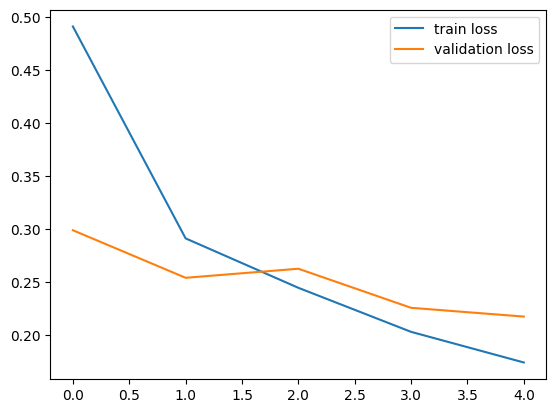

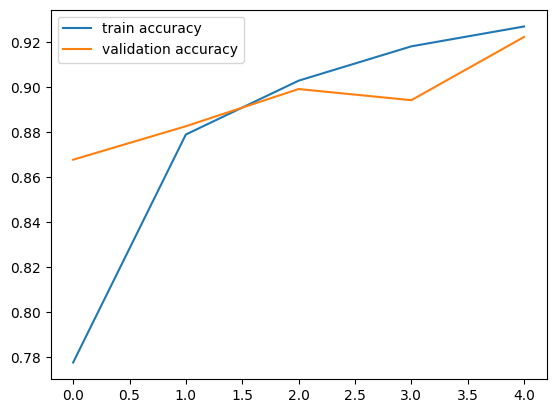

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with mask image.jfif


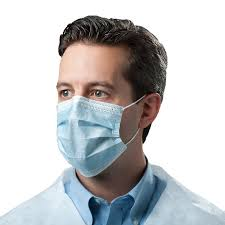

1/1 [==============================] - 0s 31ms/step
[[0.4648318 0.5603119]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with out mask image.png


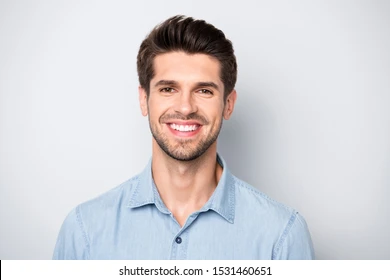

1/1 [==============================] - 0s 47ms/step
[[0.52629966 0.4753076 ]]
0
The person in the image is not wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')